# Deploying the Kalman Filter to Influence the Trajectory of an Air-to-Air Missile

### Trey Whitehead
### AM111 Final Project



In [631]:
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PART ZERO

**Abstract:**
This project focused on the application of univariate and multivariate Kalman filters to two unique case studies: the first involving the safe landing of an airplane and the second simulating the interception of a plane by a missile. Through this work, I aimed to demonstrate the practical utility and effectiveness of Kalman filters in dynamic systems. The accomplishments include successfully inventing, implementing, and analyzing a three-dimensional and nine-dimensional filter in each case study.

**Introduction:**
This project was driven by the primary goal of in-depth exploration into the application of Kalman filters, encompassing both univariate and multivariate variants, within dynamic systems. The intriguing facet of Kalman filters lies in their exceptional ability to estimate the state of a system by seamlessly integrating noisy measurements and dynamic models. This investigation delved into the nuanced aspects of Kalman filters, shedding light on their adaptive prowess in scenarios as complex as orchestrating the controlled landing of an airplane and strategically intercepting a plane with a missile. Beyond the broader context, the project aimed to unravel the intricacies of Kalman gain, measurement residuals, Gaussian distributions, equations of motion, and noise modeling, emphasizing their pivotal roles in achieving precise and robust state estimation. The accomplishments of this endeavor extend beyond mere implementation to include comprehensive simulations and rigorous evaluations, revealing the filters' prowess in navigating the intricate dynamics of these scenarios.

**Background:**
To comprehend and implement Kalman filters effectively, a deep understanding of dynamic systems, linear algebra, and control theory was essential. The theoretical foundation drew heavily from seminal works on Kalman filtering, such as Roger Labbe's online textbook and "A fresh Look at the Kalman Filter" by Humphreys, Redd, and West. Additionally, insights from aerospace engineering and missile guidance systems were integrated into the project (found on the surface level via Wikipedia). The background work paved the way for a comprehensive exploration of Kalman filters in real-world applications.

**Methods**
* Part One: What is a Kalman Filter?
* Part Two: Building Intuition
* Part Three: We're landing a plane now?!
* Part Four: A 9-Dimensional Position System and Air-to-Air Missile Case Study

Let's jump in!


# PART ONE: WHAT IS A KALMAN FILTER?

**(1.1) Kalman Filter Definition**

The Kalman filter is a recursive algorithm that estimates the state of a dynamic system from a series of noisy measurements. It is widely used in various fields such as control systems, navigation, and signal processing. The Kalman filter relies on a set of mathematical equations to predict the current state of a system and update the prediction based on new measurements.

# PART TWO: BUILDING INTUITION

**(2.1) The Components**

To effectively model a Kalman filter, there are two critical steps that must be taken into consideration: the prediction step and the update step.

**(2.2.1) The Prediction Step**

First, there is **the prediction step**. In the prediction step, the Kalman filter predicts the current state of the system based on the previous state and system dynamics. This prediction is associated with an uncertainty, which is represented by a Gaussian distribution. The process of predicting the state involves two main components:


1.   State Prediction
2.   Error Covariance Prediction

While both are typically modeled with linear transformations, the state prediction step indicates where the next iteration of the system's evolution, while the error covariance step predicts the covariance matrix.

For the American Airlines position prediction case study in Section $3$, we will be using equations of motion. In one dimension, which we will later generalize to three, the equation for modeling position can be expressed as follows:

$\bar{x_{i}} = x_{i - 1} + v_{i} \Delta t$.
  * $x_{i - 1}$ = previous position
  * $v_{i}$ = current veolcity
  * $\Delta t$ = last timestep

Essentially, the current position can be expressed as the sum of the previous position with the current veolcity multiplied by the last timestep.

To model uncertainty in position, we call upon a series of Gaussian distributions, which we denote with $f_x$:

$\bar{x} = x + f_x$.
  * $\sigma _x$ = standard deviation
      * Measures the spread or dispersion of a set of values in a dataset.
      * $\sigma _x = \sqrt{E[X - E[X])^2}$
  * $x$ = a Gaussian representing the military asset's estimated position with respect to potential uncertainty
      * $x = \mathscr{N}(x_{estimated}, \sigma _x^2$)
  * $f_x$ = a Gaussian representing the military asset's estimated velocity with respect to potential uncertainty

This expression effectively functions as our predictive step. We will build up the intution for this step in the following section.

**(2.2.2) Covariance**

$cov_{x,y} = \frac{∑(x_i - \bar{x})(y_i - \bar{y})}{N-1}$
  * $x_i$ = data value of first variable, x
  * $y_i$ = data value of second variable, y
  * $\bar{x}$ = mean of x
  * $\bar{y}$ = mean of y
  * N = number of number of data values

According to the Oxford Languages Definition, the **covariance** is the *mean value of the product of deviations of two variates from their respective means.* In other words, the covariance provides insight into how a function retains it's form as its variables are linearly transformed.

**Expected value** is a synonym for the long-term mean of the system. Naturally, the expected value operator takes the mean of a collection of the random variable, which respect to its distribution. Covariance can be defined in terms of expected value as follows:

  $cov_{x,y} = E[(X - E(X)]E(Y-E[Y])$

  The expected value operator is linear, which means the above expression may be simplified to:

  $cov_{x,y} = E[XY] - E[X]E[Y]$

  Subbing in our expression for standard deviation, we further find that:

  $cov_{x,x} = var_x = \sigma _x^2$

  For two distinctive variables, X and Y, this relationship becomes:

  $\sqrt{cov_{x,y}} = \sigma _{xy}$

  *NOTE: From now on, we will use $\mu$ for our mean instead of $E(X)$.*

**(2.2.3) Putting Things Together**

Through our review of probabilistic keystones and our institution of the $1-D$ positon prediction system, we are ready to solidify our predictive step.

The sum of two Gaussians is a Gaussian:

$\bar{x} = \mu_x + \mu_{f_x}$.

$\bar{\sigma^2} = \sigma_x^2 + \sigma_{f_x}^2$.

Therefore, we may generalize our prediction step as

$\bar{x_\mathscr{N}} = x_\mathscr{N} \bigoplus f_{x_\mathscr{N}}$.

Through the addition of Gaussian distributions, we can account for uncertainty within our system. The sum of two expected values tells us where we should be. The sum of the variances gives us an error margin that our prediction may fall within. This idea is visualized in the code below:



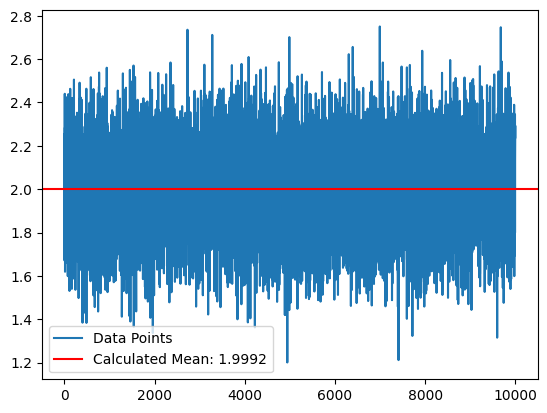

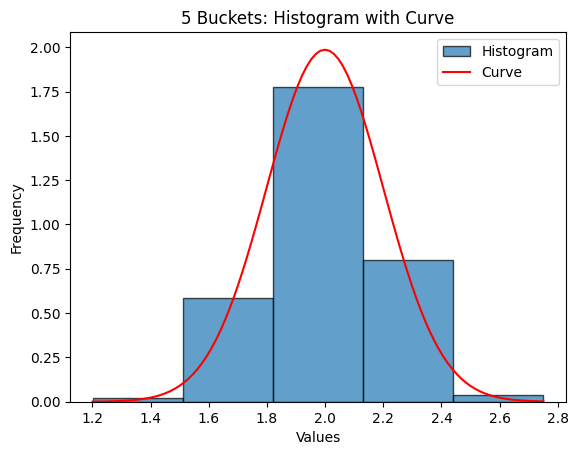

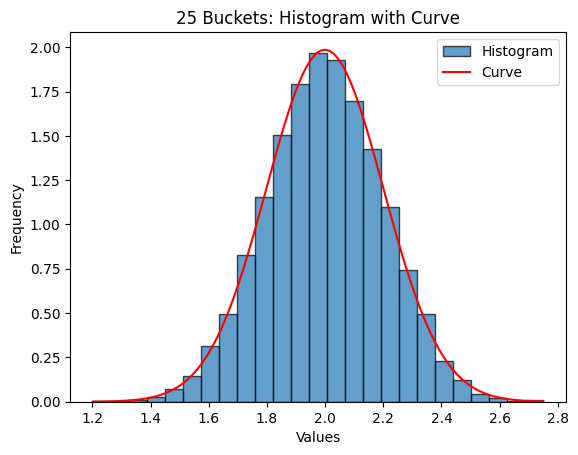

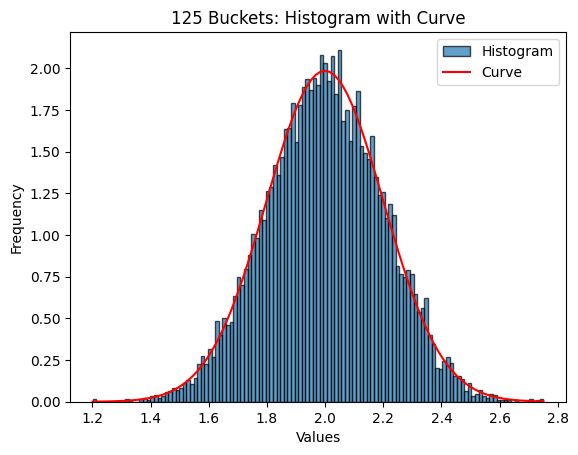

In [632]:
# EXAMPLE: Let's say a man is walking at 1m/s in the x-direction.
# However, let's say the standard deviation of uncertainty in his position is 0.1m after 1 second

# Intiialize vectors for position and velocity that take into account their mean and standard deviation
# We will initialize each time step as 1 unit so that we might add velocity * time directly to the previous position

p1 = [1, 0.1]
v1 = [1, 0.1]

# The predict function
def oneD_predict(position, velocity):
    return [position[0] + velocity[0], position[1] + velocity[1], velocity[0], velocity[1]]

# Determine the number of evaluations
evaluations = 10000

# Initialize an array for storing data points
points = np.zeros(evaluations)

# Calculate mean via the predict function, given N evaluations
for i in range(0, evaluations):
    estimate = np.random.normal(oneD_predict(p1,v1)[0], oneD_predict(p1,v1)[1])
    # print(f"Trial {i + 1}: The man's estimated x-position is {estimate}m.")
    points[i] = estimate

# Plot the points to get an understanding of the mean
plt.plot(points, label = 'Data Points')
avg = np.mean(points)
plt.axhline(y = avg, color='red', label = f"Calculated Mean: {avg.round(4)}")
plt.legend()
plt.show()

# Initialize a function to streamline a linear plot representation of the Gaussian pdf
def gaussian_pdf(x, mu, std):
    return (1 / (std * (2 * np.pi)**0.5)) * np.exp(-(x - mu)**2 / (2 * std**2))

# Define a function for plotting a histogram to show a normal distribution
def plot_histogram(data, num_bins):
    plt.hist(data, bins=num_bins, edgecolor='black', density=True, alpha=0.7, label='Histogram')
    # Fit a curve
    mu, std = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 100)
    y = gaussian_pdf(x, mu, std)
    # Plot the curve and histogram
    plt.plot(x, y, color='red', label='Curve')
    plt.title(f"{num_bins} Buckets: Histogram with Curve")
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot the results with varying numbers of buckets
for i in range(1,4):
   plot_histogram(points, 5**i)

# Notice how our plot supports the consensus that the sum of Gaussians is a Gaussian!

**(2.3) The Update Step**

In the update step, the Kalman filter incorporates new measurements to improve the estimate of the system state. The update is also associated with a Gaussian distribution that represents the uncertainty in the measurements.

**(2.3.1) Bayes' Theorem**

The update step follows directly from Bayes' Theorem, the foundation of conditional probability:

$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$
  * $P(A|B)$ = Posterior Probability
    * The Probability of event A being true, given B is true.
  * $P(B|A)$ = Likelihood
    * The Probability of event B being true, given A is true.
  * $P(A)$ = Prior Probability
    * The probability of event A being true
  * $P(B)$ = Marginal Probability
    * The independent probability of the evidence (event B)

In other words, what is the probability of A happening if B already happened?

Within our Kalman Filter, however, we are working with a distribution of probabilities, not singular probabilities. Thus, our generalized Bayes' Theorem becomes $ p(A|B) = \frac{p(B|A)p(A)}{p(B)}$, where the lowercases $p$s represent $\textbf{probability density functions}$ (PDFs).

In Python, our update function will take the following form:


In [633]:
# Define an update function
def update_pythonexample(likelihood, prior):
    updated_posterior = likelihood * prior
    normalized_posterior = updated_posterior / sum(updated_posterior)
    return normalized_posterior

It is important to note that we can expand out $P(B)$ with the $\textbf{Law of Total Probability}$, which can be expressed as follows:

$P(B) = P(B | A) \cdot P(A) + P(B | A^c) \cdot P(A^c)$

The reason why we sum the $\textbf{updated posterior probabilities}$ is to ensure that all $\textbf{normalized posterior probabilites}$ sum to 1; effectively, the sum serves as our divisor and captures the total probability of B, given all occurences (or non-occurences) of event $A_i$.

Thus, we may mathematically express our update function as

${x_\mathscr{N}} = \mathscr{L} \bigotimes \bar{x_\mathscr{N}}$.
* $\mathscr{L}$: Likelihood of a prior measurement, given the prior $\bar{x}_{\mathscr{N}}$



The product of two Gaussians is proportional to another Gaussian ([Kalman-and-Bayesian-Filters-in-Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/00-Preface.ipynb)) of the following form:

$ \mu = \frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1}{\sigma_1^2 + \sigma_2^2} $

$ \sigma^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}$

We analyze an example of the multiplication of two Gaussian PDFs below:

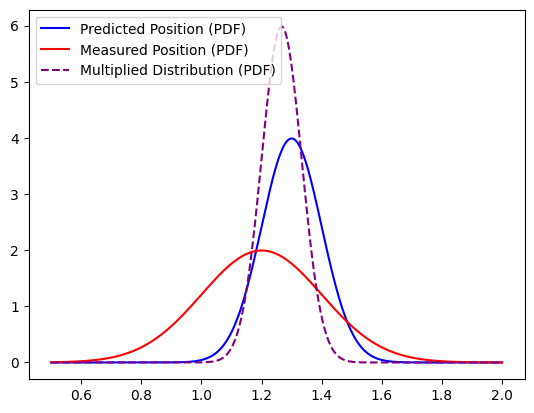

In [634]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize a predicted position random variable and measured position random variable
# var = [mean, variance]
p1 = [1.3, 0.1]
m1 = [1.2, 0.2]

# Define a function for multiplying Gaussian Distributions that returns a vector
def gaussian_multiply(x, y):
    mean = ((x[1] * y[0]) + (y[1] * x[0])) / (x[1] + y[1])
    variance = (x[1] * y[1]) / (x[1] + y[1])
    return [mean, variance]

# Define the number of samples and interval
samples = np.linspace(0.5, 2, evaluations)

# Plot the initial distributions for the predicted and measured random variables
plt.plot(samples, gaussian_pdf(samples, p1[0], p1[1]), label='Predicted Position (PDF)', color='blue')
plt.plot(samples, gaussian_pdf(samples, m1[0], m1[1]), label='Measured Position (PDF)', color='red')

# Find the resulting PDF from Gaussian multiplication
multiplied_distribution = gaussian_multiply(p1, m1)

# Plot the new PDF
plt.plot(samples, gaussian_pdf(samples, multiplied_distribution[0], multiplied_distribution[1]), label='Multiplied Distribution (PDF)', linestyle='dashed', color='purple')
plt.legend()
plt.show()

# Define update function
def update1(prior, likelihood):
    posterior = gaussian_multiply(prior, likelihood)
    return posterior


**(2.3.2) Gaussian Multiplication Summarized**

Notice how the standard deviation in the multiplied distribution shrinks. This is a direct consequence of the $0$s in the predicted position distribution and the $0$s in the measured position distribution that narrow the updated distribution. Essentially, we can use Gaussian multiplication to motivate the predictions generated by our Kalman filter.

On the subject of filtering, we are now ready to use our predict and update functions to generate our first Kalman filter!





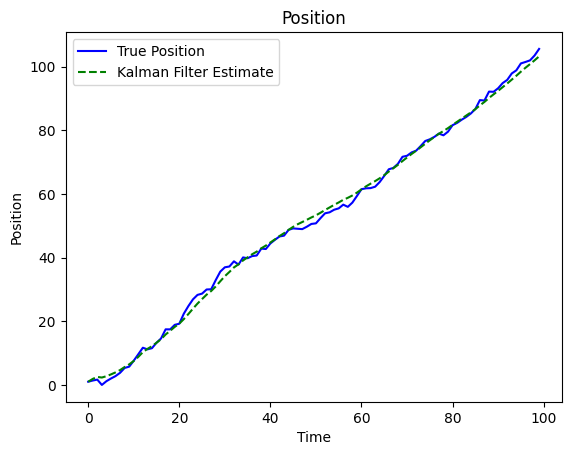

In [635]:
def kalman_filter_1D(predict, update, p1, v1, timesteps, dt):

    # Initialize arrays to store results
    # 4 columns: Stores true position, variance in position, velocity, and variance in velocity at each time step
    actuals = np.zeros((timesteps, 4))
    kalman_states = np.zeros((timesteps, 4))

    # Initial conditions arrays
    actuals[0] = [p1[0], p1[1], v1[0], v1[1]]
    kalman_states[0] = [p1[0], p1[1], v1[0], v1[1]]

    # Simulate the system over time
    for i in range(1, timesteps):
        # Noise
        noise = np.random.normal(0.2, 0.1)

        # True process model with velocity variance
        process_model = np.random.normal(v1[0] * dt, (v1[1])**0.5)
        actuals[i] = predict(actuals[i - 1], [process_model, (v1[1])**0.5])

        # Generate a noisy measurement
        measurement = np.copy(actuals[i])
        measurement[:2] += noise

        # Kalman filter prediction step with velocity variance
        prior = predict(kalman_states[i - 1], [v1[0], (kalman_states[i - 1, 3])**0.5])

        # Kalman filter measurement update step
        # Update position and position variance
        kalman_states[i, :2] = update(prior[:2], measurement[:2])
        # Update velocity and velocity variance
        kalman_states[i, 2:] = measurement[2:]

        # print(f"Timestep \t \t True Position \t \t Kalman Prediction")
        # print(f"{i} \t \t {actuals[i, 0]} \t \t {kalman_states[i, 0]}")
        # print(f"Timestep \t \t True Velocity \t \t Kalman Prediction")
        # print(f"{i} \t \t {actuals[i, 2]} \t \t {kalman_states[i, 2]}")
        # print("\n")


    # Plot the true position and Kalman filter estimates
    plt.plot(actuals[:, 0], label='True Position', color='blue')
    plt.plot(kalman_states[:, 0], label='Kalman Filter Estimate', linestyle='dashed', color='green')
    plt.title('Position')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

    # # Plot the true velocity and Kalman filter estimates
    # plt.plot(actuals[:, 2], label='True Velocity', color='blue')
    # plt.plot(kalman_states[:, 2], label='Kalman Filter Estimate', linestyle='dashed', color='green')
    # plt.title('Velocity')
    # plt.xlabel('Time')
    # plt.ylabel('Position')
    # plt.legend()
    # plt.show()

# Initial position
p1 = [1, 1]

# Initial velocity
v1 = [1, 1]

kalman_filter_1D(oneD_predict, update1, p1, v1, 100, 1)

**(2.4) An Alternative View into the Kalman Filter**
By inspection of the graph above, we can conclude that our math works, but why? It is not immediately intuitive as to why the addition and multiplication of Gaussian distributions yields such an accurate result.

In the update and predict function, there are several implicit substeps that are worth discussing:

* **Measurement Residual:** The difference between the actual measurement and the predicted measurement.

* **Kalman Gain:** The degree to which the prediction must be adjusted based on the measurement residual and the predicted error covariance.

* **State Update:** The predicted state is updated based upon the measurement residual and Kalman gain.

* **Error Covariance Update:** The predicted error covariance is updated based on the Kalman Gain.

These ideas are captured in the diagram below, borrowed from the following link: ([Kalman-and-Bayesian-Filters-in-Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/06-Multivariate-Kalman-Filters.ipynb)).:

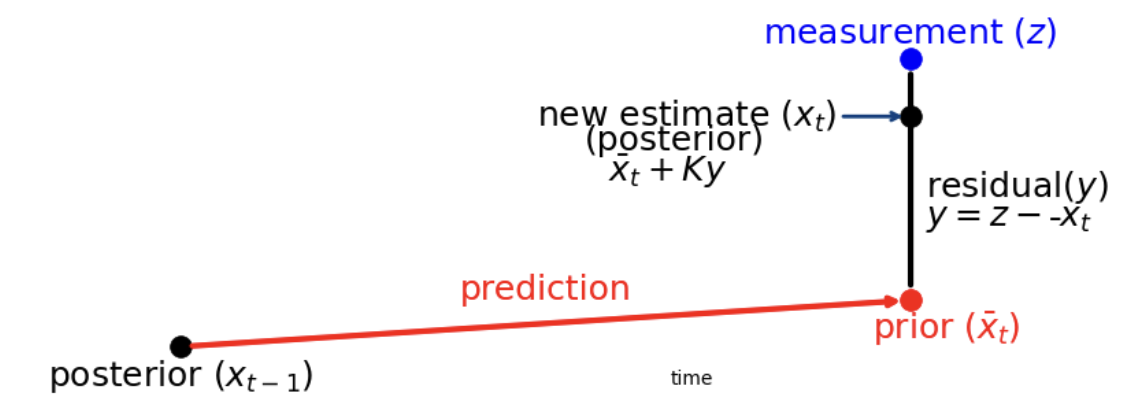


**(2.4.1) A Summary of the Kalman Filter, in the Univariate Kalman Form**

Let us review the three components of the Kalman Filter.

**(2.4.1.1) Initialization**

* First, we identify the state of the filter. In our case, that will be the posterior.

**(2.4.1.2) Predict**

* Next, we examine the system's behavior to guess the evolution of the state at the following timestep.

* Given that we are dealing with probability distributions, there is a degree of uncertainty in our predictions. We adjust our guess to reflect these stochastic elements.

**(2.4.1.3) Update + Filter**

* After finding a measurement of the state and approximating how accurate it might be, we find the difference between our estimated state (from the prediction step) and the measurement. We call this value the *residual*.

* Next, we find the Kalman gain, which is a scaling factor that determines the weight given to the measurement and the prediction (prior). It is computed based on the covariance of the predicted state (prior) and the covariance of the measurement. The Kalman Gain essentially adjusts the balance between the predicted state and the measurement, giving more weight to the one with lower uncertainty.

* Based upon the Kalman Gain, we set our state to fall somewhere between the measurement and prior.

* Finally, we conclude our finish updating our filter by updating belief in the state based on how certain we are in the measurement, via an error covariance adjustment predicated upon the Kalman Gain.

**(2.4.2) An Equivalent Python System**

Instead of using an initial position and velocity, we will now take the prior and measurement for inputs to the update function and the posterior and movement as inputs to our predict function.

In [636]:
# Prior, measurement, posterior, and movement will all be vectors.
# Their first entry will be expected value and their second entry will be their variance.
# The posterior called in the predict function is found via the update function.

def update_simple(prior, measurement):
    # Mean of prior (estimate)
    x = prior[0]
    # Mean of measurement
    z = measurement[0]
    # variance of prior (estimatge)
    P = prior[1]
    # Variance of measurement
    R = measurement[1]

    # Find the residual
    residual = z - x
    # Find the Kalman Gain scaling factor
    kalman_gain = P / (P + R)

    # Find the posterior estimate
    x = x + kalman_gain * residual
    # Find the posterior variance
    P = (1 - kalman_gain) * P
    # Set the posterior vector
    posterior = [x,P]
    return posterior

def predict_simple(posterior, movement, dt):
    # Mean of posterior
    x = posterior[0]
    # Variance of posterior
    P = posterior[1]
    # Mean of movement
    dx = movement[0]
    # Variance of movement
    Q = movement[1]

    # Add in noise to the movement
    # Represented randomly by a normal distribution with a std set to the square root of variance in the movement
    # This is a new addition, relative to our last Kalman filter
    dx += np.random.normal(0, Q**(0.5))

    # Update the posterior based upon movement
    x = x + dx * dt
    # Update the uncertainty in the prediction of our new state
    P = P + Q * dt
    # Set the updated measurement vector
    new_estimate = [x,P]
    return new_estimate

For proof of concept, we will just track position in this example, comparing the actual measurements to the Kalman states generated with our predict and update functions. Furthermore, we will be taking a function which codes up a function which generates real-world measurements. In turn, our Kalman filter will use these more concrete measurements instead of the ones generated via noise and the predict function in our first 1D Kalman filter:

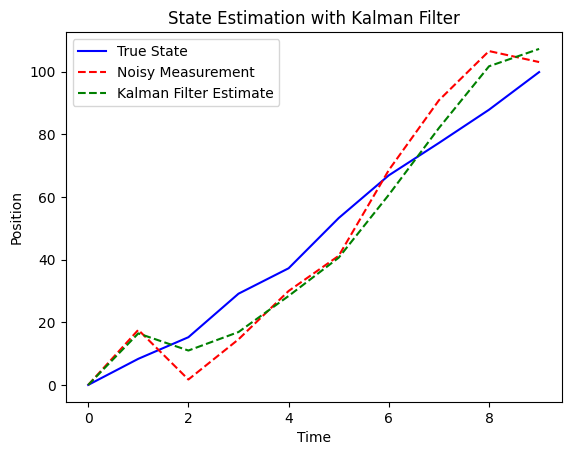

In [637]:
def generate_measurement(actual_state, measurement_noise_variance):
    noise = np.random.normal(0, measurement_noise_variance, len(actual_state))
    return actual_state + noise

def kalman_filter(predict, update, generate_measurement, initial_state, movement, measurement_noise_variance, timesteps, dt):
    actuals = np.zeros((timesteps, len(initial_state)))
    measurements = np.zeros((timesteps, len(initial_state)))
    kalman_states = np.zeros((timesteps, len(initial_state)))

    # Initialize actual state and Kalman filter state
    actuals[0] = initial_state
    kalman_states[0] = initial_state

    for i in range(1, timesteps):
        # True process model
        actuals[i] = predict_simple(actuals[i - 1], movement, dt)

        # Generate a noisy measurement
        measurements[i] = generate_measurement(actuals[i], measurement_noise_variance)

        # Kalman filter prediction step
        kalman_states[i] = predict(kalman_states[i - 1], movement, dt)

        # Kalman filter measurement update step
        kalman_states[i] = update(kalman_states[i], [measurements[i, 0], measurement_noise_variance])

    return actuals, measurements, kalman_states

# Initial state
initial_state = [0, 100]

# Movement (mean and variance)
movement = [10, 10]

# Number of timesteps and time step
timesteps = 10
dt = 1

# Measurement noise variance
measurement_noise_variance = 10

# Run the Kalman filter
actuals, measurements, kalman_states = kalman_filter(predict_simple, update_simple, generate_measurement, initial_state, movement, measurement_noise_variance, timesteps, dt)

# Plot the results
plt.plot(actuals[:, 0], label='True State', color='blue')
plt.plot(measurements[:, 0], label='Noisy Measurement', linestyle='dashed', color='red')
plt.plot(kalman_states[:, 0], label='Kalman Filter Estimate', linestyle='dashed', color='green')
plt.title('State Estimation with Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

# PART THREE: WE'RE LANDING A PLANE NOW?!

**(3.1) A 3-D Application**

Now that we have established our intutition, we are going to take on the task of abstracting our system out to three dimensions, in which every dimension has its own calculations. Fortunately, this exercise becomes easier if we parameterize our system, examining the development of each specific dimension over time. In doing so, we might overlook the impact that one dimension could have on another, but it will simplify our American Airlines case study. We will begin by reviewing the basic setup for multivariate Kalman Filters.

The following tables outline the primary differences between the univariate and multivariate Kalman filter. They have been inspired by the following link: ([Kalman-and-Bayesian-Filters-in-Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/06-Multivariate-Kalman-Filters.ipynb)).

**Predict**

| Univariate             | Univariate (Kalman Form) | Multivariate |
| :---------------- | :------: | ----: |
| $\bar{x} = \mu_x + \mu_{f_x}$        |   $\bar{x} = x + dx$   | $\bar{x} = Fx + Bu $ |
| $\bar{\sigma^2} = \sigma_x^2 + \sigma_{f_x}^2$           |   $\bar{P} = P + Q$   | $\bar{P} = FPF^T + Q$ |

**Update**

| Univariate             | Univariate (Kalman Form)        | Multivariate            |
| :----------------: | :------: | :--------------------: |
||$y = z - \bar{x}$|$y = z - H\bar{x}$|
||$K = \frac{\bar{P}}{\bar{P} + R}$   | $K = \bar{P}H^T(H\bar{P}H^T + R)^{-1}$ |
| $ \mu = \frac{\sigma^2 \mu_z + \sigma_z^2 \mu}{\sigma^2 + \sigma_z^2} $  |   $x = \bar{x} + Ky$   | $x = \bar{x} + Ky$ |
| $ \sigma^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}$  |   $P = (1-K)\bar{P}$   | $P = (I-KH)\bar{P}$ |


**Key**
* $x$ = state mean
* $P$ = covariance
* $F$ = state transition function
  * When multiplied by x, it becomes the prior
* $B$, $u$ = represent control inputs to the system
* $Q$ = process covariance
  * Corresponds to $\sigma^2_{f_x}$
* $H$ = measurement function
* $z$ = measurement mean
  * Corresponds to $z$
* $R$ = noise covariance
  * Corresponds to $\sigma^2_{z}$
* $y$ is the residual
* $K$ is the Kalman gain


We see many of these terms in the univariate, or 1-D, Kalman filter. Thus, the biggest distinction between the multivariate system and the initial Kalman representation in the first dimension will be matrix multiplication.

However, several of the key terms are new, so we must develop intuition for them in order to properly use them.

**(3.2) Tracking an Airplane**

American Airlines Flight 4952 from Boston to Louisville is on final approach, carrying a curious college student that wants to track the planes approximate descent. To do so, this student, who we will call Trey, wants to use a Kalman filter, but in order to do so, he needs to initialize a state transition function.

**(3.2.1) State Transition Function**

The state transition function, represented by $F$, will represent position in a $3$-dimensional space.

Trey decides to model position with the following set of equations:

* $\bar{x} = x + f_x$
* $\bar{y} = y + f_y$
* $\bar{z} = z + f_z$

These equations can be put in matrix form as follows:

\begin{align}
    F &= \begin{bmatrix}
           1 & 0 & 0\\
           0 & 1 & 0\\
           0 & 0 & 1
         \end{bmatrix}
\end{align}

\begin{align}
    x &= \begin{bmatrix}
           x \\
           y \\
           z
         \end{bmatrix}
\end{align}

\begin{align}
    B &= \begin{bmatrix}
           1 & 0 & 0\\
           0 & 1 & 0\\
           0 & 0 & 1
         \end{bmatrix}
\end{align}

\begin{align}
    u &= \begin{bmatrix}
           u_x \\
           u_y \\
           u_z
         \end{bmatrix}
\end{align}


This yields the system:

$\bar{x} = Fx + Bu$, where $x$ represents the state variable, while $B$ and $u$ initialize control inputs. These control inputs, and especially $u$, will prove vital to modeling the random development of the $x$, $y$, and $z$ positions over time.


**(3.2.2) State Covariance**

State covariance is a diagonal matrix in which every diagonal entry represents the covariance for the associated state variable. It may be represented as follows:

\begin{align}
    P &= \begin{bmatrix}
           cov_x & 0 & 0\\
           0 & cov_y & 0\\
           0 & 0 & cov_z
         \end{bmatrix}
\end{align}



**(3.2.3) Prediction Function**

Now, Trey arrives at the prediction function, which follows from the table above:

$\bar{x} = Fx $

$\bar{P} = FPF^T + Q$



In [638]:
def predict_n(x, F, P, Q, B, u):
    x = F @ x.T + B @ u.T
    P = F @ P @ F.T + Q
    return x, P

**(3.2.4) Update Function**


The measurement function $H$ is a matrix that maps the current state estimate $x$ to the expected measurement space. It defines how the state relates to the measurements that are obtained from the real-world system.

Measurement noise represents the uncertainty or error in the sensor measurements. The covariance matrix $R$ quantifies how the noise in each measurement dimension is correlated with the noise in other dimensions.

Incoporating these pieces and buidling on 1-D beginnings, the update function from the table can be represented in Python as follows:

In [639]:
def update_n(x, P, H, R, z):
    # Compute the residual between the measured and predicted values
    y = z - H @ x.T

    # Compute the residual covariance
    S = H @ P @ H.T + R

    # Compute the Kalman gain
    K = P @ H.T @ np.linalg.inv(S)

    # Update the state estimate based on the measurement
    x = x + K @ y.T

    # Update the state covariance based on the measurement
    P = (np.eye(len(x)) - K @ H) @ P

    # Return the updated state estimate and state covariance
    return x, P


The image was pulled from the following link: ([Kalman-and-Bayesian-Filters-in-Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/06-Multivariate-Kalman-Filters.ipynb)). It summarizes the multivariate Kalman Filter quite eloquently.

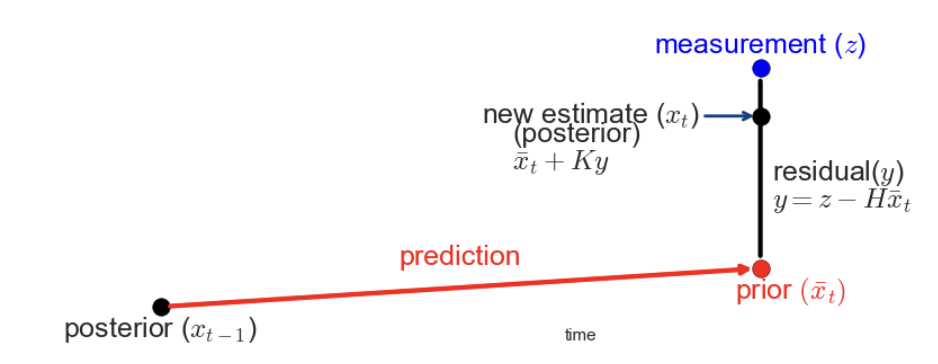

**(3.2.5) Generating Measurement Noise**

Anticipating interference on the descent, Trey creates a measurement function which generates noise, which he hopes his Kalman filter will help reconcile.

In [640]:
def generate_measurement_noise(mean, std_dev, size):
    return np.random.normal(mean, std_dev, size)

**(3.2.6) Initial Conditions**

Trey knows that his airplane is 5 miles up, and 100 miles away from the runway in the x- and y- directions. As such, he wants to take advantage of what he learned in his APMTH 111 class and turns to interpolation, creating a series of evaluation points beginning at $[100,100,5]$ and ending at $[0,0,0]$, which he suspects his flight might go through on their way to Muhammad Ali International Airport.

Furthermore, he decides that his flight, at any time step and in any direction, could fluctuate by a 5% a mile due to inclement weather. He gives the same margin of error to the radar sensors on the ground, which he considers generous given today's technology. In his calculations, he also decides to ignore the impact that error could have when within a mile of altitude from the runway itself.

The flight is traveling at 200 miles an hour on average during the descent (faster at the start, slower at the end). Given that the plane is $\sqrt(100^2 + 100^2 + 5^2) \approx 142$ miles away, Trey thinks that it will take about 45 minutes for the plane to get to the runway. He finds 45 minutes from the following calculation: $ [(142 \text{ miles } / 200 \frac{\text{miles}}{\text{hours}}) * 60{ \text{ minutes}}] + \epsilon$ , where $\epsilon$ represesnts a "flex window." He decides to take a sample at every minute, yielding $45$ time steps.

In [641]:
# Initial state
start_state = np.array([100, 100, 5])
# Ending state
end_state = np.array([0,0,0])

# State transition matrix
F1 = np.eye(3)

# Initial state covariance
P1 = np.eye(3)

# Control input matrix
B1 = np.eye(3)

# Process noise covariance
# Find matrix for x-y plane
Q1 = np.zeros((3, 3))
for i in range(3):
    Q1[i, i] = np.random.normal(0, 0.05)

# Control input
u1 = np.zeros(3)
for i in range(3):
    u1[i] = np.random.normal(0, 0.1)

# Measurement noise mean and standard deviation
measurement_noise_mean1 = 0
measurement_noise_std1 = 0.1

# Measurement noise covariance
R1 = measurement_noise_std1**2 * np.eye(3)

# Measurement matrix (identity matrix since it directly measures the state)
H1 = np.eye(3)

# Number of timesteps
timesteps = 45

# Linear interpolation for initial state
initial_states = np.linspace(start_state, end_state, timesteps)

**(3.2.7) 3-D Kalman Filter**

Trey holds his breath, hoping his code will run as he puts his Kalman filter together with the new predict and update functions, as well as his rickety initial conditions.

In [642]:
def simulate_kalman(timesteps, start_state, end_state, F, P, Q, B, u, H, R, measurement_noise_mean, measurement_noise_std, n):
    # Initialize array to store measurements
    measurements = np.zeros((timesteps, 3))

    # Simulation loop for ten timesteps
    for i in range(timesteps):
        # Use the current initial state
        x1 = initial_states[i]

        # Simulate prediction step
        x, P = predict_n(x1, F1, P1, Q1, B1, u1)

        # Simulate measurement with noise
        measurement_noise = generate_measurement_noise(measurement_noise_mean, measurement_noise_std, n)
        z = x + measurement_noise

        # Simulate update step
        x, P = update_n(x, P, H, R, z)

        # Save data for plotting
        measurements[i] = z

        # Noise goes away below 1 miles of altitude
        if measurements[i][2] < 1:
            measurement_noise = 0

        # Prevent crashes
        if measurements[i][2] < 0:
            measurements[i][2] = 0.05

        # Explicitly set the last state to [0, 0, 0] so the plane lands
        measurements[-1] = [0, 0, 0]

    return measurements

measurements = simulate_kalman(timesteps, start_state, end_state, F1, P1, Q1, B1, u1, H1, R1, measurement_noise_mean1, measurement_noise_std1, 3)

print(simulate_kalman(timesteps, start_state, end_state, F1, P1, Q1, B1, u1, H1, R1, measurement_noise_mean1, measurement_noise_std1, 3))

[[1.00051584e+02 1.00127333e+02 4.98138321e+00]
 [9.80483678e+01 9.78450936e+01 4.95164280e+00]
 [9.56193138e+01 9.55504245e+01 4.74869834e+00]
 [9.32911220e+01 9.32136845e+01 4.80702587e+00]
 [9.10591915e+01 9.09477501e+01 4.42914466e+00]
 [8.86043210e+01 8.86794823e+01 4.34320360e+00]
 [8.65581541e+01 8.64990513e+01 4.31415679e+00]
 [8.40372142e+01 8.40679021e+01 4.15833287e+00]
 [8.21504376e+01 8.19725814e+01 4.06797779e+00]
 [7.97157837e+01 7.95347140e+01 4.00182247e+00]
 [7.73640525e+01 7.73181098e+01 3.96328582e+00]
 [7.52752870e+01 7.50780775e+01 3.56339594e+00]
 [7.29130812e+01 7.26877889e+01 3.58987648e+00]
 [7.04879903e+01 7.04604709e+01 3.55737888e+00]
 [6.81867014e+01 6.82551470e+01 3.23561111e+00]
 [6.59662474e+01 6.59970862e+01 3.49572606e+00]
 [6.37802479e+01 6.36609631e+01 3.07945583e+00]
 [6.16383549e+01 6.12550774e+01 3.15260163e+00]
 [5.90837309e+01 5.91477128e+01 2.86729294e+00]
 [5.69643895e+01 5.69374627e+01 2.87135933e+00]
 [5.45903239e+01 5.44927069e+01 2.877905

**(3.2.8) Plotting the Results**

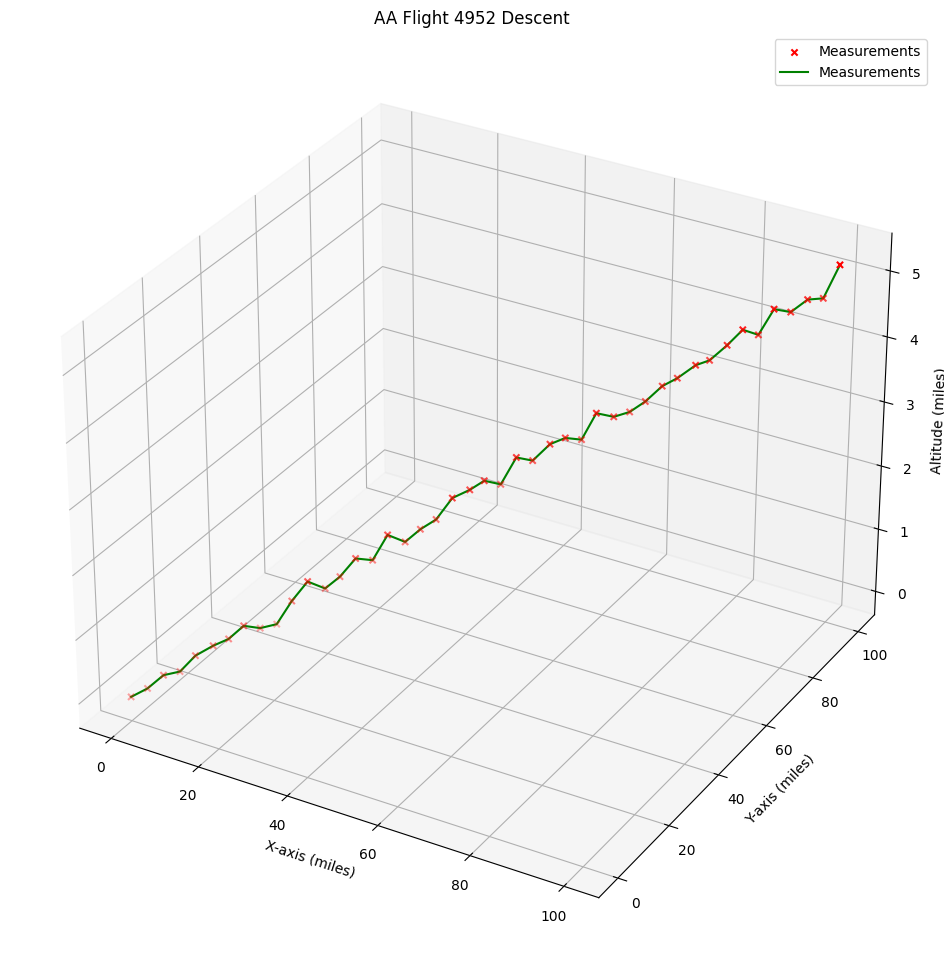

In [643]:
# Plot the results in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(measurements[:, 0], measurements[:, 1], measurements[:, 2], label='Measurements', color='red', marker='x')
ax.plot(measurements[:, 0], measurements[:, 1], measurements[:, 2], label='Measurements', color='green')

ax.set_xlabel('X-axis (miles)')
ax.set_ylabel('Y-axis (miles)')
ax.set_zlabel('Altitude (miles)')
ax.legend()
plt.title('AA Flight 4952 Descent')

plt.show()


Fortunately for Trey, his Kalman filter finds that with slight deviations, he will make it home safe and sound, albeit with a severe lack of sleep and yearning for homecooked meals.

# PART FOUR: A 9-Dimensional Position System and Air-to-Air Missile Case Study



In Part $3$, our state mean and state transition function failed to account for velocity and acceleration in the $x$-,$y$-, and $z$- directions.

We will now use the following system:

* $\bar{x} = x + v_x \Delta t + \frac{1}{2}a_x\Delta t^2 + f_x$
* $\bar{\dot{x}} = v_x + a_x\Delta t$
* $\bar{\ddot{x}} = a_x$
* $\bar{y} = y + v_y \Delta t + \frac{1}{2}a_y\Delta t^2 + f_y$
* $\bar{\dot{y}} = v_y + a_y\Delta t$
* $\bar{\ddot{y}} = a_y$
* $\bar{z} = z + v_z \Delta t + \frac{1}{2}a_z\Delta t^2 + f_z$
* $\bar{\dot{z}} = v_z + a_z\Delta t$
* $\bar{\ddot{z}} = a_z$

Our ultimate goal will be to filter and predict the flight of an enemy fighter jet. We will send out a short-range, error-correcting missile deployed from another aircraft within a certain radius, to intercept and destroy the enemy jet.

We do not know which way the enemy jet will veer, but given that we will be modeling this problem from the position of the friendly pilot, we will deploy the missile from the location of said pilot, which we will consider the origin. To prove that this system could work from any location within the aforementioned radius, we will assume that the pilot is pointed in the general direction of the enemy jet when it deploys its missile.

Fortunately, we set up our Kalman Filter in section three to handle any $n \times n$ matrix. What proves complicated to model is the sensor that details the location of the enemy pilot.

We will randomly generate the starting location of the enemy pilot, which we will assume is no more than $5,000$ km away in any direction. Our timstep will be $0.05$ seconds to mitigate how much the plane could deviate from its approximate trajectory.

Furthermore, we will assume that the missile travels at a rate faster than the plane. Therefore, we will point the missile at the next predicted location of the plane, filter its path, and then reupdate its trajectory after the next timestep of the plane has come to pass.

As I have not read anything about a filtering system like this, I will be dubbing my process as the *Iteratively-Updated Bi-Party Location Predictor*. Although this is a little wordy and does not yield a convenient acronym, it will have to do for now.

For the initial run-through of this system, I will assume $0$ acceleration for all directions. The thrust from the plane and missile should counteract the force due to gravity, and I do not have enough information to estimate the velocity required to counteract it over time. Furthermore, we will assume that the enemy plane is flying at a speed it has no intenion of drastically training.

Here are our initial conditions:

In [691]:
# length of timestep
dt = 0.05

# Mechanics for acceleration of enemy plane
pax1 = 0
pay1 = 0
paz1 = 0

# Initial plane velocity [NEED TO CHANGE]
plane_start_vel = random.randint(1000, 2000)
# Initialize velocities
pvx1 = random.randint(0, 100)
pvy1 = random.randint(0, 100)
# Limit velocity in z-direction
pvz1 = random.randint(0, 10)
# Normalize velocities
velocity_normalization_constant = np.linalg.norm([pvx1, pvy1, pvz1])
# Update velocities
pvx1 = (pvx1 / velocity_normalization_constant) * plane_start_vel
pvy1 = (pvy1 / velocity_normalization_constant) * plane_start_vel
pvz1 = (pvz1 / velocity_normalization_constant) * plane_start_vel

# Mechanics for position of enemy plane
px1 = random.randint(0, 5000) + pvx1 * dt + pax1 * dt**2
py1 = random.randint(0, 5000) + pvy1 * dt + pay1 * dt**2
pz1 = random.randint(0, 5000) + pvz1 * dt + paz1 * dt**2

# Initial plane start state
plane_start_pos = np.array([px1, pvx1, pax1, py1, pvy1, pay1, pz1, pvz1, paz1])
plane_start_pos = plane_start_pos.reshape((1, 9))

print(plane_start_pos)
print(plane_start_vel)

[[1278.35886503  987.17730059    0.         2892.785522    595.71044001
     0.         3092.40405966   68.08119314    0.        ]]
1155


In [692]:
# For directional purposes, find the norm of all of the initial positions to get a distance from target for i + 1 approximate position (i = 0 to start)
direction_normalization_constant = np.linalg.norm([px1, py1, pz1])

# Mechanics for acceleration of missile
max1 = 0
may1 = 0
maz1 = 0

# Missile speed (assuming it is constant) [NEED TO CHANGE]
missile_speed = plane_start_vel
# Initial missile mechanics
# The velocity of the x, y, and z components will be directed at the next apprximate position of the plane. . .need to incoporate acceleration
mvx1 = (px1 / direction_normalization_constant) * missile_speed
mvy1 = (py1 / direction_normalization_constant) * missile_speed
mvz1 = (pz1 / direction_normalization_constant) * missile_speed

# Mechanics for position of missile
mx1 = 0
my1 = 0
mz1 = 0

# Initial missile start state
missile_start_pos = np.array([mx1, mvx1, max1, my1, mvy1, max1, mz1, mvz1, maz1])
missile_start_pos = missile_start_pos.reshape((1, 9))

print(missile_start_pos)

[[  0.         333.80336716   0.           0.         755.36030933
    0.           0.         807.48443648   0.        ]]


In [697]:
# State transition matrix
F_a = np.array([[1,dt,0.5*dt**2,0,0,0,0,0,0],
      [0,1,dt,0,0,0,0,0,0],
      [0,0,1,0,0,0,0,0,0],
      [0,0,0,1,dt,0.5*dt**2,0,0,0],
      [0,0,0,0,1,dt,0,0,0],
      [0,0,0,0,0,1,0,0,0],
      [0,0,0,0,0,0,1,dt,0.5*dt**2],
      [0,0,0,0,0,0,0,1,dt],
      [0,0,0,0,0,0,0,0,1]])

# Initial state covariance
# Initially, we'll keep the covariance at 1 for each variable, given that we have a high degree of precision given military objects of measurement
P_a = np.eye(9)

# Control input matrix
B_a = np.eye(9)

# Process noise covariance
# Find matrix for x-y plane
Q_a = np.zeros((9, 9))
for i in range(9):
    Q_a[i, i] = np.random.normal(0, 0)

# Control input
u_a = np.zeros(9)
# for i in range(9):
#     u_a[i] = np.random.normal(0, 0)

# Plane measurement noise mean and standard deviation
plane_measurement_noise_mean = 0
plane_measurement_noise_std = 0

# Missile measurement noise mean and standard deviation
missile_measurement_noise_mean = 0
missile_measurement_noise_std = 0

# Measurement plane noise covariance
R_p = plane_measurement_noise_std**2 * np.eye(9)

# Measurement missile noise covariance
R_m = missile_measurement_noise_std**2 * np.eye(9)

# Measurement matrix (identity matrix since it directly measures the state)
H_a = np.eye(9)

# Number of timesteps
timesteps = 25

# Accelerated sampling for missile directional error correction
# I need to conduct more reserach to accurately forecast this
# accelerated_sampling = int(missile_speed / plane_start_vel)
accelerated_sampling = 2

#Test
print(np.dot(F_a, plane_start_pos.T))

[[1327.71773006]
 [ 987.17730059]
 [   0.        ]
 [2922.571044  ]
 [ 595.71044001]
 [   0.        ]
 [3095.80811931]
 [  68.08119314]
 [   0.        ]]


In [698]:
def reshape_array_by_indices(data, row_indices):
    # Stack the data along the vertical axis
    stacked_data = np.vstack(data)

    # Initialize the result list
    result_list = []

    # Loop through the row indices
    for row_index in row_indices:
        # Extract the corresponding elements for each row
        row_values = stacked_data[:, row_index]

        # Append the row values to the result list
        result_list.append(row_values)

    # Convert the result to a NumPy array and transpose it
    reshaped_array = np.array(result_list).T

    return reshaped_array

In [699]:
def missile_detector(timesteps, plane_start_state, missile_start_state, F, P, Q, B, u, H, R1, R2, measurement_noise_mean1, measurement_noise_std_dev1, measurement_noise_mean2, measurement_noise_std_dev2, accelerated_sampling):
    plane_measurements = []
    missile_measurements = []

    # Initial states for plane and missile
    xp = plane_start_state
    xm = missile_start_state

    # Simulation loop for timesteps
    for i in range(timesteps):

        # Simulate prediction step for the plane
        xp, Pp = predict_n(xp, F, P, Q, B, u)

        # Simulate plane measurement with noise
        measurement_noise_plane = generate_measurement_noise(measurement_noise_mean1, measurement_noise_std_dev1, 9)
        zp = xp + measurement_noise_plane

        # Simulate update step for the plane
        xp, Pp = update_n(xp, Pp, H, R1, zp)

        # Save data for plotting
        plane_measurements.append(zp)

        # Simulation loop for accelerated_sampling times for the missile
        for j in range(accelerated_sampling):

            initial_states = np.linspace(xm, zp, timesteps * accelerated_sampling)

            x1 = initial_states[j]

            # Simulate prediction step for the missile
            xm, Pm = predict_n(x1, F, P, Q, B, u)

            # Simulate measurement with noise for the missile
            measurement_noise_missile = generate_measurement_noise(measurement_noise_mean2, measurement_noise_std_dev2, 9)
            zm = xm + measurement_noise_missile

            # Simulate update step for the missile
            xm, Pm = update_n(xm, Pm, H, R2, zm)

            # Save data for plotting
            missile_measurements.append(zm)

        # Check distance between cpm and cmm after each timestep
        row_indices = [0, 3, 6]
        cpm = reshape_array_by_indices(plane_measurements, row_indices)[0::3][:, 0].reshape(-1, 3)
        cmm = reshape_array_by_indices(missile_measurements, row_indices)[0::3][:, 0].reshape(-1, 3)

    return cpm, cmm

cpm, cmm = missile_detector(timesteps, plane_start_pos, missile_start_pos, F_a, P_a, Q_a, B_a, u_a, H_a, R_p, R_m, plane_measurement_noise_mean, plane_measurement_noise_std, missile_measurement_noise_mean, missile_measurement_noise_std, accelerated_sampling)

# Initialize array for capturing intersection points
intersection_indices = []

# Calculate norms for each row
cpm_norms = np.linalg.norm(cpm, axis=1)
cmm_norms = np.linalg.norm(cmm, axis=1)

# Find differences and check for intersection
for i, norm_cpm in enumerate(cpm_norms):
    for j, norm_cmm in enumerate(cmm_norms):
        diff = np.abs(norm_cpm - norm_cmm)
        if diff < 10 and 1.7 < np.abs(j / i) < 2.3:
            intersection_indices.append((i, j))


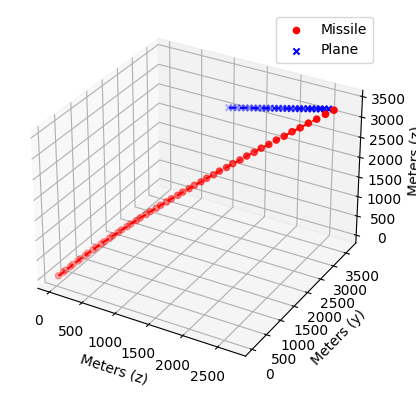

In [701]:
# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # Show the intersection points
# for i, j in intersection_indices:
#     ax.scatter(cpm[i, 0], cpm[i, 1], cpm[i, 2], s=100, c='purple', marker='*')

# Scatter plot
xm, ym, zm = zip(*cmm)
xp, yp, zp = zip(*cpm)
ax.scatter(xm, ym, zm, c='red', marker='o', label='Missile')
ax.scatter(xp, yp, zp, c='blue', marker='x', label='Plane')

# Line plot
ax.plot(xm, ym, zm, c='red', linestyle='dashed')
ax.plot(xp, yp, zp, c='blue', linestyle='dashed')

ax.set_xlabel('Meters (z) ')
ax.set_ylabel('Meters (y) ')
ax.set_zlabel('Meters (z)')
ax.legend()

plt.show()

Direct hit.

# PART FIVE: CONCLUSION


**Results:**

The results delineated above speak for themselves. Parts 3 and 4 demonstrate what a potent tool the Kalman filter can prove to be, especially when abstracted out to higher dimensions and fueled with a large system of input vectors.

**Conclusion:**

In conclusion, this project underscores the remarkable effectiveness of Kalman filters, particularly when applied to the intricate dynamics of a 9-dimensional system. Through the successful implementation, simulation, and evaluation of both univariate and multivariate Kalman filters, the project has demonstrated their prowess in achieving precise state estimation amidst the challenges posed by noisy measurements and complex dynamic models. The adaptability and robustness of Kalman filters were notably evident in the controlled landing of an airplane and the strategic interception of a plane with a missile.

Moreover, beyond the confines of the air-to-air missile case study, the project opens avenues for extended applications of Kalman filters across diverse domains. The effectiveness showcased in the context of this project suggests broader applicability in fields such as robotics, finance, and autonomous systems. The adaptability of Kalman filters to high-dimensional systems positions them as valuable tools for enhancing the accuracy and reliability of state estimation in a wide range of real-world scenarios. As technology continues to evolve, the insights gained from this project underscore the enduring relevance and versatility of Kalman filters in addressing the challenges of dynamic systems across various domains.

**References:**

* Humpherys, Jeffrey, Preston Redd, and Jeremy West. 2012. “A Fresh Look at the Kalman Filter.” Siam Review 54 (4): 801–23. https://doi.org/10.1137/100799666.
* Labbe, Roger. 2015. “Kalman and Bayesian Filters in Python.” GitHub. 2015. Accessed December 5, 2023. https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/07-Kalman-Filter-Math.ipynb.

**A Thank You:**

Without a doubt, this has been one of the coolest mathematical projects I have taken on in college, and I look forward to presenting tomorrow. Thank you for your patience, and I apologize for the delayed submission. With my concussion, it has been a challenging week, and I should have gone to HUHS sooner. Have a wonderful winter break.